# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

570

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Function to query API and retrive results in json

def weather_check(cities, unit="imperial"):
    base_url = "http://api.openweathermap.org/data/2.5/find?"
    query_url = f"{base_url}q={cities}&units={unit}&appid={weather_api_key}"
    
    response = requests.get(query_url).json()
    
    return response

In [4]:
# Create lists to hold relevant data in loop

city_id = list()
city_name = list()
temp = list()
humidity = list()
clouds = list()
wind_speed = list()
weather_lat = list()
weather_lng = list()
country = list()
weather_date = list()

In [5]:
# For loop, track number of city processed and number of set processed

record_roll = 0
set_roll = 1

In [6]:
# Print log of data retrival process using loop 

print("Beginning Data Retrieval")
print("-"*30)

for city in cities:
  
    try:
        json_data = weather_check(city) # Using defined function
        city_id.append(json_data['list'][0]['id'])
        city_name.append(json_data['list'][0]['name'])
        temp.append(json_data['list'][0]['main']['temp_max'])
        humidity.append(json_data['list'][0]['main']['humidity'])
        clouds.append(json_data['list'][0]['clouds']['all'])
        wind_speed.append(json_data['list'][0]['wind']['speed'])
        weather_lat.append(json_data['list'][0]['coord']['lat'])
        weather_lng.append(json_data['list'][0]['coord']['lon'])
        country.append(json_data['list'][0]['sys']['country'])
        weather_date.append(json_data['list'][0]['dt'])
    
        if record_roll > 49:
            record_roll = 1
            set_roll += 1
        
        else:
            record_roll += 1
        
        print(f"Processing Record {record_roll} of Set {set_roll} | {json_data['list'][0]['id']} : {json_data['list'][0]['name']}")
        
    except Exception:
        print("City not found. Skipping...")

print("-"*30)
print("Data Retrieval Complete")
print("-"*30)

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | 3139597 : Sistranda
Processing Record 2 of Set 1 | 6201424 : Mataura
Processing Record 3 of Set 1 | 1507390 : Dikson
Processing Record 4 of Set 1 | 3451138 : Rio Grande
Processing Record 5 of Set 1 | 2082539 : Merauke
Processing Record 6 of Set 1 | 6185377 : Yellowknife
Processing Record 7 of Set 1 | 4030556 : Rikitea
City not found. Skipping...
Processing Record 8 of Set 1 | 3361934 : Saldanha
Processing Record 9 of Set 1 | 155016 : Malinyi
Processing Record 10 of Set 1 | 758651 : Sokółka
Processing Record 11 of Set 1 | 2514651 : Los Llanos de Aridane
Processing Record 12 of Set 1 | 1272446 : Dohrighāt
Processing Record 13 of Set 1 | 3883457 : Lebu
Processing Record 14 of Set 1 | 1258269 : Rāzole
Processing Record 15 of Set 1 | 4032243 : Vaini
Processing Record 16 of Set 1 | 3366880 : Hermanus
Processing Record 17 of Set 1 | 3141667 : Roald
City not found. Skipping...
Processing Record 18 of Set 1 |

Processing Record 49 of Set 3 | 3867427 : Mayor Pablo Lagerenza
Processing Record 50 of Set 3 | 3347719 : Luena
Processing Record 1 of Set 4 | 2361373 : Diapaga
Processing Record 2 of Set 4 | 5690532 : Minot
Processing Record 3 of Set 4 | 2643044 : Margate
Processing Record 4 of Set 4 | 3372472 : Vila Franca do Campo
Processing Record 5 of Set 4 | 1651810 : Airai
Processing Record 6 of Set 4 | 5746545 : Portland
Processing Record 7 of Set 4 | 1489661 : Tevriz
Processing Record 8 of Set 4 | 5983626 : Invermere
City not found. Skipping...
Processing Record 9 of Set 4 | 4021858 : Guerrero Negro
Processing Record 10 of Set 4 | 1235846 : Matara
Processing Record 11 of Set 4 | 1634614 : Nabire
Processing Record 12 of Set 4 | 1258366 : Ratangarh
Processing Record 13 of Set 4 | 3584003 : Puerto El Triunfo
Processing Record 14 of Set 4 | 5563839 : Fortuna
Processing Record 15 of Set 4 | 2012530 : Zhigansk
Processing Record 16 of Set 4 | 5962442 : Goderich
Processing Record 17 of Set 4 | 1486321

Processing Record 5 of Set 7 | 1717787 : Catuday
City not found. Skipping...
Processing Record 6 of Set 7 | 481548 : Troitsko-Pechorsk
Processing Record 7 of Set 7 | 1714733 : Dingle
Processing Record 8 of Set 7 | 2036069 : Linjiang
Processing Record 9 of Set 7 | 3454005 : Piaçabuçu
Processing Record 10 of Set 7 | 4944903 : Nantucket
Processing Record 11 of Set 7 | 1083724 : Ambanja
Processing Record 12 of Set 7 | 778707 : Mehamn
Processing Record 13 of Set 7 | 53654 : Mogadishu
Processing Record 14 of Set 7 | 3517970 : Pochutla
Processing Record 15 of Set 7 | 6112608 : Powell River
Processing Record 16 of Set 7 | 5973108 : Hearst
Processing Record 17 of Set 7 | 2315417 : Inongo
Processing Record 18 of Set 7 | 2012593 : Zeya
Processing Record 19 of Set 7 | 636947 : Siilinjärvi
Processing Record 20 of Set 7 | 3670218 : San Andrés
Processing Record 21 of Set 7 | 4231997 : Avera
Processing Record 22 of Set 7 | 5849996 : Lahaina
Processing Record 23 of Set 7 | 927856 : Livingstonia
Process

Processing Record 10 of Set 10 | 5017822 : Bemidji
Processing Record 11 of Set 10 | 3466980 : Caravelas
Processing Record 12 of Set 10 | 6690297 : Saint-Leu
Processing Record 13 of Set 10 | 1278969 : Along
Processing Record 14 of Set 10 | 1510041 : Biryusinsk
Processing Record 15 of Set 10 | 3470142 : Belford Roxo
Processing Record 16 of Set 10 | 1855612 : Nara-shi
Processing Record 17 of Set 10 | 3175788 : Oga
Processing Record 18 of Set 10 | 2108857 : Gizo
Processing Record 19 of Set 10 | 513329 : Staryye Ozinki
Processing Record 20 of Set 10 | 1526038 : Atbasar
Processing Record 21 of Set 10 | 2255414 : Pointe-Noire
Processing Record 22 of Set 10 | 2510573 : Teguise
Processing Record 23 of Set 10 | 7671223 : Kloulklubed
Processing Record 24 of Set 10 | 3589770 : San Mateo Ixtatán
Processing Record 25 of Set 10 | 3412093 : Vestmannaeyjar
Processing Record 26 of Set 10 | 189741 : Lamu
Processing Record 27 of Set 10 | 376332 : Doka
Processing Record 28 of Set 10 | 2525041 : Cefalù
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Merge all lists into a Data Frame

city_data = pd.DataFrame({"City Number": city_id,
                          "City Name": city_name,
                          "Lat": weather_lat,
                          "Lng": weather_lng,
                          "Max Temp": temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": weather_date})
city_data.count()

City Number    525
City Name      525
Lat            525
Lng            525
Max Temp       525
Humidity       525
Cloudiness     525
Wind Speed     525
Country        525
Date           525
dtype: int64

In [8]:
city_data.head()

,City Number,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,3139597,Sistranda,63.7256,8.8340,55.99,100,75,5.82,NO,1595823246
1,6201424,Mataura,-46.1927,168.8643,50.47,62,0,1.14,NZ,1595819783
2,1507390,Dikson,73.5069,80.5464,38.44,87,96,14.05,RU,1595822999
3,3451138,Rio Grande,-32.0350,-52.0986,46.00,96,35,9.66,BR,1595823277
4,2082539,Merauke,-8.4667,140.3333,81.45,75,57,19.66,ID,1595823063


In [9]:
# Export pandas data frame to csv

city_data.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# To check if any cities have max humidity > 100%

city_data.describe()

,City Number,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,5.250000e+02,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,5.250000e+02
mean,2.781323e+06,19.239131,16.934336,69.829143,71.779048,50.685714,7.511010,1.595823e+09
std,1.684556e+06,33.133507,91.877212,13.598885,19.687946,37.915966,5.196219,2.952199e+02
min,5.365400e+04,-54.800000,-175.200000,32.000000,11.000000,0.000000,0.250000,1.595820e+09
25%,1.622318e+06,-7.050000,-60.438800,60.800000,62.000000,10.000000,3.360000,1.595823e+09
50%,2.274275e+06,22.075200,20.040300,71.600000,75.000000,54.000000,6.240000,1.595823e+09
75%,3.584003e+06,47.260000,99.511700,80.600000,87.000000,90.000000,10.290000,1.595823e+09
max,8.079926e+06,78.218600,179.316700,100.400000,100.000000,100.000000,27.940000,1.595824e+09


There are no cities in my sample where recorded humidity exceeds 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# Function to scatter plot and save diagrams into output_data folder

def plot_and_save(x_data, y_data, y_label, filename, date="27/07/2020"):
    
    # Create scatter plot
    scatter_plot = city_data.plot(x_data, y_data, 
                                  kind="scatter",
                                  alpha=0.7,
                                  edgecolors="k",
                                  c="c",
                                  title=f"City Latitude vs {y_label} ({date})")

    # Plot grid lines
    scatter_plot.grid(b=True, which="major", axis="both",
                      linestyle="-", color="lightgrey")
    
    # Set axis labels
    scatter_plot.set_xlabel("Latitude")
    scatter_plot.set_ylabel(y_label)
    
    # Save figure
    plt.savefig(f"output_data/{filename}")
    
    plt.show()

## Latitude vs. Temperature Plot

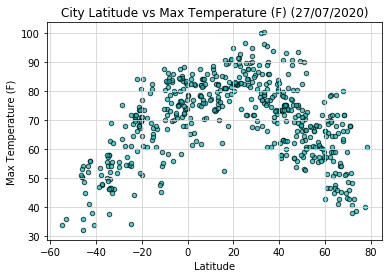

In [12]:
plot_and_save("Lat","Max Temp","Max Temperature (F)", "Fig1") # Call function

This plot shows the correlation between latitude and the daily maximum temperature in fahrenheit. We can observe that there is a linear relationship where temperatures are higher nearer to the equator (at 0 degree latitude) and vice versa.

Interestingly though, the tempteratures are highest at approximately 20 degree latitude rather than the equator. This is likely due to the tilt of the Earth's axis at this time of the year, causing the Sun to be nearer to cities along the Tropic of Cancer (approximately 23.5 degree latitude).

## Latitude vs. Humidity Plot

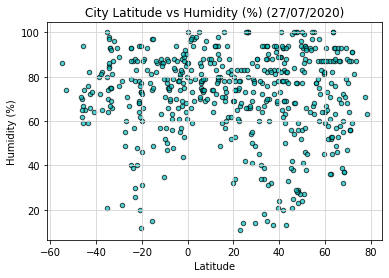

In [13]:
plot_and_save("Lat","Humidity","Humidity (%)", "Fig2") # Call function

This plot shows the relationship between latitude and the percentage humidity. It does not appear that latitude has a significant correlation with humudity. 

However, we can observe that most of the cities tend to have higher humidity as confirmed by the interquartile range of between 87% and 62% humidity. Further,  cities close to the equator (0 degree latitude) tend to be more humid (lowest is approximately 40% humidity). There are 2 clusters of cities with humidity under 40% at around 20 to 40 degree latitude within both the northern and southern hemisphere. 

## Latitude vs. Cloudiness Plot

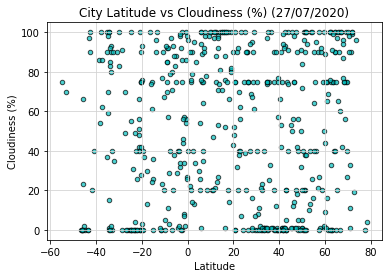

In [14]:
plot_and_save("Lat","Cloudiness","Cloudiness (%)", "Fig3") # Call function

This plot shows the correlation between latitude and percentage cloudiness. There is no strong correlation between the two variables.

We can observe a wide spread of cloudiness across the range of latitudes. We can confirm the variability by looking at the standard deviation of 37.9% for cloudiness in our earlier table.

However, we can observe a 3 clusters worth mentioning. First cluster has 100% cloudiness for cities between 0 and 20 degree latitude. The second and third clusters are the 0% cloudiness at around 20 to 40 degree latitudes at both sides of the hemisphere. Taken with our earlier observation on latitude and humidity, this could potentially suggest that tropical cities closer to the equator tend to be cloudier and there are drier, more desert-like climate in cities along the Tropic of Cancer and Tropic of Capricon.

## Latitude vs. Wind Speed Plot

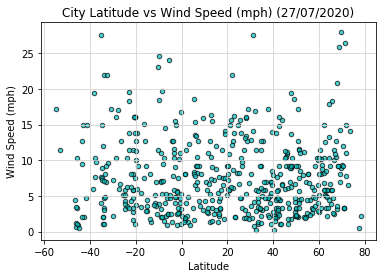

In [15]:
plot_and_save("Lat","Wind Speed","Wind Speed (mph)", "Fig4") # Call function

This plot shows that there is no strong correlation between latitude and wind speed. 

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

# Function to linear regression plot

def linear_regression_plot(table, x_data, y_data, hemisphere, unit, date="27/07/2020"):

    # Use linregress function to find key values to be stored in variables 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(table[x_data], table[y_data])
    equation = slope * table[x_data] + intercept # Linear regression equation
    printequation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    
    # Create scatter plot
    scatter = table.plot(x=x_data, y=y_data, 
                         kind="scatter", alpha=0.7, 
                         c="c", edgecolors="k")
    
    # Plot grid lines
    scatter.grid(b=True, which="major", axis="both", 
                 linestyle="-", color="lightgrey")
    
    # Set axis labels & title
    scatter.set_xlabel("Latitude")
    scatter.set_ylabel(f"{y_data.title()} {unit}")
    scatter.set_title((f"{hemisphere} Hemisphere: City Latitude vs {y_data} ({date})").title())
    
    # Plot linear regression line
    plt.plot(table[x_data],equation,"m-.", linewidth=1)
    
    # Print linear regression equation
    plt.annotate(printequation, 
                 (table[x_data].quantile(0),table[y_data].quantile(1)*.95), 
                 fontsize=15, color="m") 
    plt.show()
    
    # State coefficient of determination
    return print(f"The r-squared is: {round(rvalue**2,8)}")

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern = city_data[city_data["Lat"]>=0] # Where latitude is 0 or more
southern = city_data[city_data["Lat"]<0] # Where latitude is less than 0

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

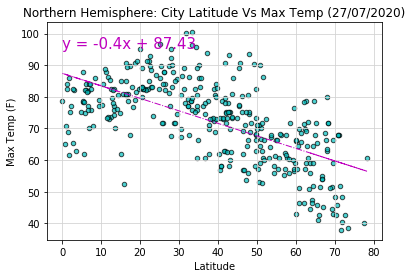

The r-squared is: 0.39039238


In [18]:
linear_regression_plot(northern,"Lat","Max Temp","Northern","(F)") # Call function

This proves our earlier observation that there is a linear relationship between latitude and temperature. The r-squared shows that the linear regression model can explain 39% of the variation. 

We can improve the goodness of fit by adjusting the data based on the current tilt of the Earth's axis (for example, only including data from 20 degree latitude onwards). 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

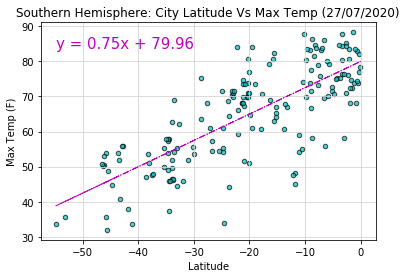

The r-squared is: 0.58400477


In [19]:
linear_regression_plot(southern,"Lat","Max Temp","Southern","(F)") # Call function

Again, this corroborates with our earlier observations where the model can explain 58% of the variation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

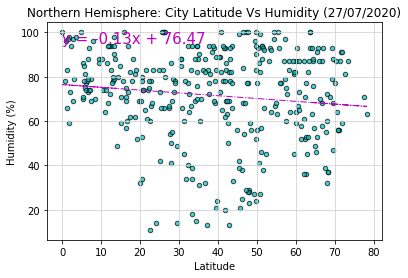

The r-squared is: 0.01530849


In [20]:
linear_regression_plot(northern,"Lat","Humidity","Northern","(%)") # Call function

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

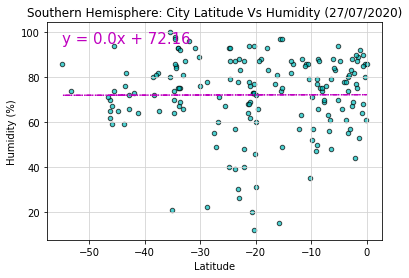

The r-squared is: 6.5e-06


In [21]:
linear_regression_plot(southern,"Lat","Humidity","Southern","(%)") # Call function

Both r-squared values show a poor goodness of fit for the fitted regression line. This proves that there is no linear relationship between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

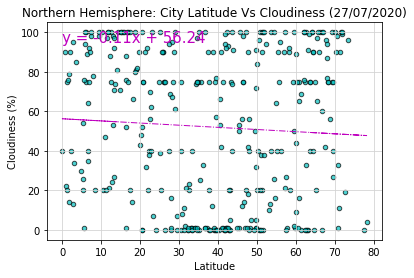

The r-squared is: 0.00333605


In [22]:
linear_regression_plot(northern,"Lat","Cloudiness","Northern","(%)") # Call function

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

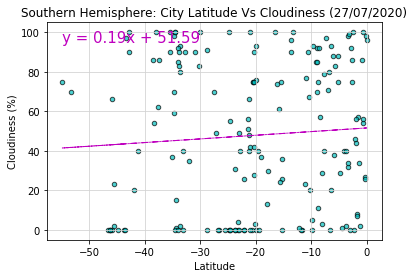

The r-squared is: 0.00490651


In [23]:
linear_regression_plot(southern,"Lat","Cloudiness","Southern","(%)") # Call function

Both r-squared values show a poor goodness of fit for the fitted regression line. This proves that there is no linear relationship between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

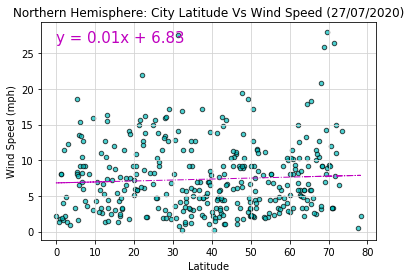

The r-squared is: 0.00312908


In [24]:
linear_regression_plot(northern,"Lat","Wind Speed","Northern","(mph)") # Call function

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

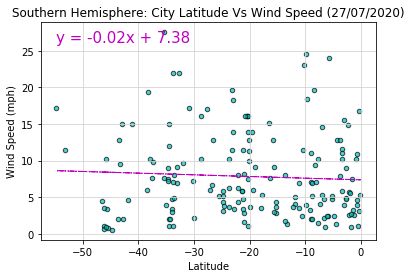

The r-squared is: 0.00316255


In [25]:
linear_regression_plot(southern,"Lat","Wind Speed","Southern","(mph)") # Call function

Both r-squared values show a poor goodness of fit for the fitted regression line. This proves that there is no linear relationship between latitude and wind speed.